## Solutions

Chapter 6: Discrete Cosine Transform


In [2]:
from __future__ import print_function, division

import thinkdsp
import thinkplot
import thinkstats2

import numpy as np
import scipy.fftpack

import warnings
warnings.filterwarnings('ignore')

import dct

%matplotlib inline

**Exercise:** In this chapter I claim that `analyze1` takes time proportional
to $n^3$ and `analyze2` takes time proportional to $n^2$.  To
see if that's true, run them on a range of input sizes and time
them.  In IPython, you can use the magic command `%timeit`.

If you plot run time versus input size on a log-log scale, you
should get a straight line with slope 3 for  `analyze1` and
slope 2 for `analyze2`.  You also might want to test `dct_iv`
and `scipy.fftpack.dct`.

I'll start with a noise signal and an array of power-of-two sizes

In [9]:
signal = thinkdsp.UncorrelatedGaussianNoise()
noise = signal.make_wave(duration=1.0, framerate=16384)
noise.ys.shape

(16384,)

In [21]:
ns = 2 ** np.arange(6, 15)
ns

array([   64,   128,   256,   512,  1024,  2048,  4096,  8192, 16384],
      dtype=int32)

The following function takes an array of results from a timing experiment, plots the results, and fits a straight line.

In [22]:
def plot_bests(bests):    
    thinkplot.plot(ns, bests)
    thinkplot.config(xscale='log', yscale='log', legend=False)
    
    x = np.log(ns)
    y = np.log(bests)
    t = scipy.stats.linregress(x,y)
    slope = t[0]

    return slope

Here are the results for `analyze1`.

64
91.4 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 10000 loops each)
128
189 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 10000 loops each)
256
1.58 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1000 loops each)
512
8.14 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 100 loops each)
1024
39.4 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 10 loops each)
2048
208 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
4096
1.28 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
8192
7.13 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
16384
38.7 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


2.4062634639609293

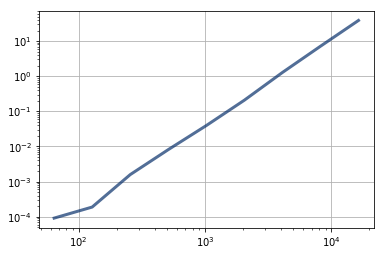

In [12]:
results = []
for N in ns:
    print(N)
    ts = (0.5 + np.arange(N)) / N
    freqs = (0.5 + np.arange(N)) / 2
    ys = noise.ys[:N]
    result = %timeit -r1 -o dct.analyze1(ys, freqs, ts)
    results.append(result)

bests = [result.best for result in results]
plot_bests(bests)

The estimated slope is close to 2, not 3, as expected.  One possibility is that the performance of `np.linalg.solve` is nearly quadratic in this range of array sizes.

The line is curved, which suggests that we have not reached the array size where the runtime shows cubic growth.  With larger array sizes, the estimated slope increases, so maybe it eventually converges on 3.

Here are the results for `analyze2`:

64.6 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 10000 loops each)
86.9 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 10000 loops each)
615 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 1000 loops each)
3.28 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 100 loops each)
12.7 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 100 loops each)
51.7 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 10 loops each)
207 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
783 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
2.81 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


2.0303493250317084

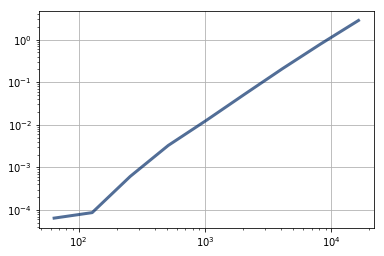

In [19]:
results = []
for N in ns:
    ts = (0.5 + np.arange(N)) / N
    freqs = (0.5 + np.arange(N)) / 2
    ys = noise.ys[:N]
    result = %timeit -r1 -o dct.analyze2(ys, freqs, ts)
    results.append(result)

bests2 = [result.best for result in results]
plot_bests(bests2)

The results for `analyze2` fall in a straight line with the estimated slope close to 2, as expected.

Here are the results for the `scipy.fftpack.dct`

7.58 µs ± 177 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
9.8 µs ± 1.35 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)
8.84 µs ± 65.7 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
11 µs ± 169 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
14.9 µs ± 801 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
22.1 µs ± 1.11 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
37.4 µs ± 370 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
77.6 µs ± 918 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
159 µs ± 6.3 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


0.5365436693673857

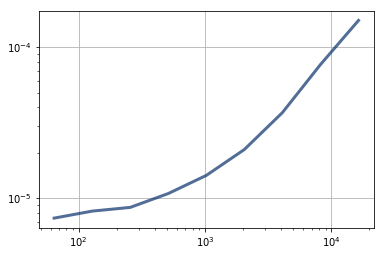

In [23]:
results = []
for N in ns:
    ys = noise.ys[:N]
    result = %timeit -o scipy.fftpack.dct(ys, type=3)
    results.append(result)

bests3 = [result.best for result in results]
plot_bests(bests3)

This implementation of dct is even faster.  The line is curved, which means either we haven't seen the asymptotic behavior yet, or the asymptotic behavior is not a simple exponent of $n$.  In fact, as we'll see soon, the run time is proportional to $n \log n$.

The following figure shows all three curves on the same axes.

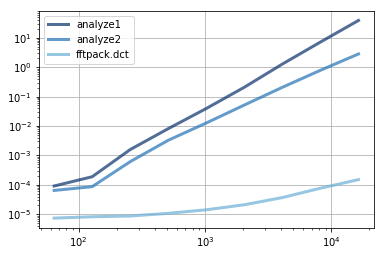

In [25]:
thinkplot.preplot(3)
thinkplot.plot(ns, bests, label='analyze1')
thinkplot.plot(ns, bests2, label='analyze2')
thinkplot.plot(ns, bests3, label='fftpack.dct')
thinkplot.config(xscale='log', yscale='log', legend=True, loc='upper left')